<a href="https://colab.research.google.com/github/Ronin1289/Price-Predictor/blob/main/Price_Predictor_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRU

##Installing Libraies

In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=73c88ddebfe344e4204af71ea9c626d4d0c17c63c5cafa56e45e816dd986af3c
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import ta
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

##Loading Data

In [ ]:

# Load Data Function
def load_data(ticker, start, end, filename="BTC-USD_data.csv"):
    df = yf.download(ticker, start=start, end=end, auto_adjust=False)
    df['RSI'] = ta.momentum.RSIIndicator(pd.Series(df['Close'].squeeze()), window=14).rsi()
    df['RSI'] = df['RSI'].astype(float)
    df['Trend'] = df['Close'].pct_change().fillna(0)
    df.dropna(inplace=True)
    df.to_csv(filename, index=True)
    print(f"Data saved to {filename}")
    return df

# Load Data
data = load_data("BTC-USD", start="2020-01-01", end="2024-01-01", filename="BTC-USD_data.csv")

# Select Features and Target
feature_columns = ['Close', 'RSI', 'Trend']
target_column = 'Close'

# Convert Data to NumPy Array
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[feature_columns])

# Create Sequences for Time Series
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Predicting Close Price
    return np.array(X), np.array(y)

seq_length = 100  # Past 50 days for prediction
X, y = create_sequences(data_scaled, seq_length)

# Split Data into Train/Test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


[*********************100%***********************]  1 of 1 completed

Data saved to BTC-USD_data.csv


##Building Model

In [1]:

# Define GRU Model
model = Sequential([
GRU(64, return_sequences=True, input_shape=input_shape),
Dropout(0.2),
GRU(32, return_sequences=False),
Dense(16, activation='relu'),
Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()


NameError: name 'Sequential' is not defined

##Training Model

In [ ]:
# Train Model with Checkpointing
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)


Epoch 1/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - loss: 6.7471e-04 - mae: 0.0183 - val_loss: 2.2266e-04 - val_mae: 0.0116
Epoch 2/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 8.0774e-04 - mae: 0.0202 - val_loss: 5.1416e-04 - val_mae: 0.0192
Epoch 3/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 6.8739e-04 - mae: 0.0193 - val_loss: 2.9582e-04 - val_mae: 0.0143
Epoch 4/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - loss: 7.0362e-04 - mae: 0.0186 - val_loss: 3.5429e-04 - val_mae: 0.0161
Epoch 5/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 6.1871e-04 - mae: 0.0179 - val_loss: 2.3947e-04 - val_mae: 0.0126


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Save weights after every epoch
checkpoint = ModelCheckpoint(
    "model_epoch_{epoch:02d}.weights.h5",
    save_weights_only=True,
    save_freq='epoch'
)
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test),callbacks=[checkpoint])


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - loss: 6.1416e-04 - mae: 0.0175 - val_loss: 5.0831e-04 - val_mae: 0.0189
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 7.4786e-04 - mae: 0.0196 - val_loss: 2.5789e-04 - val_mae: 0.0136
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - loss: 6.8301e-04 - mae: 0.0191 - val_loss: 0.0011 - val_mae: 0.0288
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - loss: 7.2149e-04 - mae: 0.0195 - val_loss: 1.7714e-04 - val_mae: 0.0103
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 8.4894e-04 - mae: 0.0214 - val_loss: 3.0078e-04 - val_mae: 0.0139
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 7.2837e-04 - mae: 0.0197 - val_loss: 1.9470e-04 - val_mae: 0.0108
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 6.0447e-04 - mae: 0.0176 - val_loss: 1.7136e-04 - val_mae: 0.0103
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 6.5173e-04 - mae: 0.0182 - val_loss: 2.1011e-04 - val_mae: 

In [ ]:
epoch_to_load = 7
weights_path = f"model_epoch_{epoch_to_load:02d}.weights.h5"
model.load_weights(weights_path)

print(f"Loaded weights from epoch {epoch_to_load}")


Loaded weights from epoch 7


##Evaluating Model

In [ ]:
from sklearn.metrics import r2_score

# Make Predictions on Test Data
y_pred = model.predict(X_test)

# Inverse Transform to Original Scale (if using MinMaxScaler)
y_test_inv = scaler.inverse_transform(np.column_stack((y_test, np.zeros((y_test.shape[0], 2)))))[:, 0]
y_pred_inv = scaler.inverse_transform(np.column_stack((y_pred.flatten(), np.zeros((y_pred.shape[0], 2)))))[:, 0]

# Compute R² Score
r2 = r2_score(y_test_inv, y_pred_inv)
print(f"R² Score: {r2:.4f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
R² Score: 0.9759


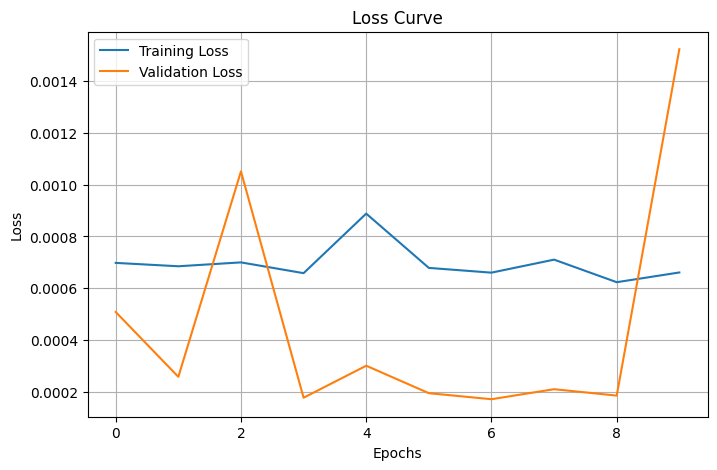

In [ ]:

# Plot Loss Curve
def plot_loss_curve(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()
    plt.grid()
    plt.show()

plot_loss_curve(history)
